#embeddings

##github

In [ ]:
!git clone -b michele https://github.com/mitchchessnoob/FroSSL.git
!cd FroSSL

Cloning into 'FroSSL'...
remote: Enumerating objects: 7034, done.
remote: Counting objects: 100% (1034/1034), done.
remote: Compressing objects: 100% (404/404), done.
remote: Total 7034 (delta 656), reused 972 (delta 608), pack-reused 6000 (from 1)
Receiving objects: 100% (7034/7034), 6.73 MiB | 11.53 MiB/s, done.
Resolving deltas: 100% (5007/5007), done.


In [ ]:
!rm -r /content/FroSSL

In [ ]:
!pip install -r /content/FroSSL/requirements.txt

Obtaining representation-itl from git+https://github.com/uk-cliplab/representation-itl.git#egg=representation-itl (from -r /content/FroSSL/requirements.txt (line 14))
  Cloning https://github.com/uk-cliplab/representation-itl.git to ./src/representation-itl
  Running command git clone --filter=blob:none --quiet https://github.com/uk-cliplab/representation-itl.git /content/src/representation-itl
  Resolved https://github.com/uk-cliplab/representation-itl.git to commit e11b3b791630f9c10dac86efaf85765ab10fe470
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of pytorch-lightning to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━

##CIFAR model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import torch.nn as nn
sys.path.append('/content/FroSSL')
from solo.methods.base import BaseMethod
from solo.methods.linear import LinearModel
from solo.utils.auto_resumer import AutoResumer
from solo.utils.checkpointer import Checkpointer
from solo.utils.checkpointer import Checkpointer
from solo.utils.checkpointer import Checkpointer
from solo.args.linear import parse_cfg

In [ ]:
from omegaconf import OmegaConf
import torch
cfg = "/content/FroSSL/scripts/pretrain/cifar/frossl.yaml"
cfg = OmegaConf.load(cfg)



cfg = parse_cfg(cfg)

backbone_model = BaseMethod._BACKBONES[cfg.backbone.name]

# initialize backbone
model = backbone_model(method=cfg.pretrain_method, **cfg.backbone.kwargs)
if cfg.backbone.name.startswith("resnet"):
        # remove fc layer
        model.fc = nn.Identity()
        cifar = cfg.data.dataset in ["cifar10", "cifar100"]
        if cifar:
            model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=2, bias=False)
            model.maxpool = nn.Identity()

ckpt_path = "/content/drive/MyDrive/Colab_Notebooks/DLL_advanced/PROJECT/MODELS/CIFAR10/frossl-cifar10-ojwnwssp-ep=999.ckpt"

assert ckpt_path.endswith(".ckpt") or ckpt_path.endswith(".pth") or ckpt_path.endswith(".pt")

state = torch.load(ckpt_path, map_location="cpu")["state_dict"]
for k in list(state.keys()):
    if "encoder" in k:
        state[k.replace("encoder", "backbone")] = state[k]
    if "backbone" in k:
        state[k.replace("backbone.", "")] = state[k]
    del state[k]
model.load_state_dict(state, strict=False)

<All keys matched successfully>

In [ ]:
def get_features(model, x, after_pooling = False):
        """
        Extract features from the model.
        Args:
            x: Input tensor of shape [B, 3, H, W]
        Returns:
            features: Tensor of shape [B, 512, h, w]
        """
        # Forward pass through convolutional layers
        x = model.conv1(x)
        x = model.bn1(x)
        x = model.relu(x)
        x = model.maxpool(x)

        x = model.layer1(x)
        x = model.layer2(x)
        x = model.layer3(x)
        features = model.layer4(x)  # [B, 512, h, w]
        if after_pooling:
            pooled = model.avgpool(features)
            return pooled.squeeze(-1).squeeze(-1)
        return features

##STL10 model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
import torch.nn as nn
sys.path.append('/content/FroSSL')
from solo.methods.base import BaseMethod
from solo.methods.linear import LinearModel
from solo.utils.auto_resumer import AutoResumer
from solo.utils.checkpointer import Checkpointer
from solo.utils.checkpointer import Checkpointer
from solo.utils.checkpointer import Checkpointer
from solo.args.linear import parse_cfg

In [ ]:
from omegaconf import OmegaConf
import torch
cfg = "/content/FroSSL/scripts/pretrain/stl10/frossl.yaml"
cfg = OmegaConf.load(cfg)



cfg = parse_cfg(cfg)

backbone_model = BaseMethod._BACKBONES[cfg.backbone.name]

# initialize backbone
model = backbone_model(method=cfg.pretrain_method, **cfg.backbone.kwargs)
if cfg.backbone.name.startswith("resnet"):
        # remove fc layer
        model.fc = nn.Identity()
        cifar = cfg.data.dataset in ["cifar10", "cifar100"]
        if cifar:
            model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=2, bias=False)
            model.maxpool = nn.Identity()

ckpt_path = "/content/drive/MyDrive/Colab_Notebooks/DLL_advanced/PROJECT/MODELS/STL10/frossl-stl10-can8rjni-ep=499.ckpt"

assert ckpt_path.endswith(".ckpt") or ckpt_path.endswith(".pth") or ckpt_path.endswith(".pt")

state = torch.load(ckpt_path, map_location="cpu")["state_dict"]
for k in list(state.keys()):
    if "encoder" in k:
        state[k.replace("encoder", "backbone")] = state[k]
    if "backbone" in k:
        state[k.replace("backbone.", "")] = state[k]
    del state[k]
model.load_state_dict(state, strict=False)

<All keys matched successfully>

In [ ]:
def get_features(model, x, after_pooling = False):
        """
        Extract features from the model.
        Args:
            x: Input tensor of shape [B, 3, H, W]
        Returns:
            features: Tensor of shape [B, 512, h, w]
        """
        # Forward pass through convolutional layers
        x = model.conv1(x)
        x = model.bn1(x)
        x = model.relu(x)
        x = model.maxpool(x)

        x = model.layer1(x)
        x = model.layer2(x)
        x = model.layer3(x)
        features = model.layer4(x)  # [B, 512, h, w]
        if after_pooling:
            pooled = model.avgpool(features)
            return pooled.squeeze(-1).squeeze(-1)
        return features

##EuroSAT model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
import torch.nn as nn
sys.path.append('/content/FroSSL')
from solo.methods.base import BaseMethod
from solo.methods.linear import LinearModel
from solo.utils.auto_resumer import AutoResumer
from solo.utils.checkpointer import Checkpointer
from solo.utils.checkpointer import Checkpointer
from solo.utils.checkpointer import Checkpointer
from solo.args.linear import parse_cfg

In [ ]:
from omegaconf import OmegaConf
import torch
cfg = "/content/FroSSL/scripts/pretrain/eurosat_msi/frossl_hat.yaml"
cfg = OmegaConf.load(cfg)




cfg = parse_cfg(cfg)

backbone_model = BaseMethod._BACKBONES[cfg.backbone.name]

# initialize backbone
model = backbone_model(method=cfg.pretrain_method, **cfg.backbone.kwargs)
if cfg.backbone.name.startswith("resnet"):
    # remove fc layer
    model.fc = nn.Identity()
    cifar = cfg.data.dataset in ["cifar10", "cifar100"]
    if cifar:
        model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=2, bias=False)
        model.maxpool = nn.Identity()
    elif cfg.data.dataset[-3:] == "msi": #TODO adapt kernel size, ..
        model.conv1 = nn.Conv2d(
            13, 64, kernel_size=7, stride=2, padding=3, bias=False
        )

ckpt_path = "/content/drive/MyDrive/Colab_Notebooks/DLL_advanced/PROJECT/MODELS/EuroSAT/eurosat_sym_inv14_longrun-pretrain-rmkgwn40-ep=399.ckpt"
# if no path, read a path from the last_ckpt file

print(ckpt_path)
assert ckpt_path.endswith(".ckpt") or ckpt_path.endswith(".pth") or ckpt_path.endswith(".pt")

state = torch.load(ckpt_path, map_location="cpu")["state_dict"]
for k in list(state.keys()):
    if "encoder" in k:
        state[k.replace("encoder", "backbone")] = state[k]
    if "backbone" in k:
        state[k.replace("backbone.", "")] = state[k]
    del state[k]
model.load_state_dict(state, strict=False)

/content/drive/MyDrive/Colab_Notebooks/DLL_advanced/PROJECT/MODELS/EuroSAT/eurosat_sym_inv14_longrun-pretrain-rmkgwn40-ep=399.ckpt


<All keys matched successfully>

In [ ]:
def get_features(model, x, after_pooling = False):
        """
        Extract features from the model.
        Args:
            x: Input tensor of shape [B, 3, H, W]
        Returns:
            features: Tensor of shape [B, 512, h, w]
        """
        # Forward pass through convolutional layers
        x = model.conv1(x)
        x = model.bn1(x)
        x = model.relu(x)
        x = model.maxpool(x)

        x = model.layer1(x)
        x = model.layer2(x)
        x = model.layer3(x)
        features = model.layer4(x)  # [B, 512, h, w]
        if after_pooling:
            pooled = model.avgpool(features)
            return pooled.squeeze(-1).squeeze(-1)
        return features

##EuroSAT dataset preprocessing

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("apollo2506/eurosat-dataset")

print("Path to dataset files:", path)

shutil.move(path, ".")

100%|██████████| 2.04G/2.04G [00:30<00:00, 72.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/apollo2506/eurosat-dataset/versions/6


In [ ]:
import shutil
import os
import pandas as pd
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image



class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.data.iloc[idx, 0])  # image_path column
        label = self.data.iloc[idx, 1]  # label column
        import rasterio
        with rasterio.open(img_path) as src:
            # Read all bands and convert to torch tensor
            image = src.read()
        if self.transform:
            image = self.transform(image)

        return image, label
class CustomToTensor:
    def __call__(self, pic):
        # Ensure the image is in float32
        pic = pic.astype(np.float32)

        # If image is 2D, add channel dimension
        if pic.ndim == 2:
            pic = pic[np.newaxis, ...]
        # If image is 3D, move channels to first dimension (H,W,C) -> (C,H,W)


        return torch.from_numpy(pic)

##Dataloader and Dataset

In [ ]:
from torchvision.datasets import CIFAR10, STL10
from torch.utils.data import DataLoader
from torchgeo.datasets import EuroSAT
from torchvision import transforms


dataset = "eurosat"

if dataset == "cifar10":
  transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

  batch_size = 128
  num_workers = 2
  dataset = CIFAR10(root='.', train=True, download=True, transform=transform_test)
  test = CIFAR10(root='.', train=False, download=True, transform=transform_test)
  train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
  test_dataloader = DataLoader(test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

  classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

elif dataset == "stl10":
  transform_test = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.4467, 0.4398, 0.4066), (0.2241, 0.2215, 0.2239)),
  ])

  batch_size = 64

  dataset = STL10(root='.', split='train', download=True, transform=transform_test)
  train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=2)

  test = STL10(root='.', split='test', download=True, transform=transform_test)
  test_dataloader = DataLoader(test, batch_size=batch_size, shuffle=False, num_workers=2)

  classes = ('airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck')

elif dataset == "eurosat":
  transform_test = transforms.Compose([
      CustomToTensor(),
      transforms.Normalize((0.1354, 0.1118, 0.1043, 0.0948, 0.1199, 0.2000, 0.2369, 0.2297, 0.0732, 0.0012, 0.1819, 0.1119, 0.2594),
                                     (0.0246, 0.0333, 0.0395, 0.0594, 0.0566, 0.0861, 0.1087, 0.1118, 0.0405, 0.0005, 0.1003, 0.0761, 0.1232)),
  ])

  root_dir = "/content/6/EuroSATallBands"  # Replace with your dataset folder
  train_csv = os.path.join(root_dir, "train.csv")
  test_csv = os.path.join(root_dir, "test.csv")

  batch_size = 64

  dataset = CustomDataset(csv_file=train_csv, root_dir=root_dir, transform=transform_test)
  test = CustomDataset(csv_file=test_csv, root_dir=root_dir, transform=transform_test)




  train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=2)
  test_dataloader = DataLoader(test, batch_size=batch_size, shuffle=False, num_workers=2)

  classes = ("Annual Crop", "Forest", "Herbaceous Vegetation", "Highway", "Industrial", "Pasture", "Permanent Crop", "Residential", "River", "Sea/Lake")

In [ ]:
import torch
import numpy as np
for images, labels in train_dataloader:
    print(images.shape, labels.shape)
    break

##embedding creations

In [ ]:
import numpy as np
samples = len(dataset)
embeddings = np.zeros((samples, 2048))
embeddings_test = np.zeros((len(test), 2048))
labels = np.zeros(samples)
labels_test = np.zeros(len(test))

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
i=0
for x, label in train_dataloader:
    x = x.to(device)
    with torch.no_grad():
        output = get_features(model, x, after_pooling = True)
    embeddings[i*batch_size:(i+1)*batch_size] = output.cpu().numpy()
    labels[i*batch_size:(i+1)*batch_size] = label.numpy()
    i+=1

In [ ]:
model.eval()
import tqdm
i=0
for x, label in tqdm(test_dataloader):
    x = x.to(device)
    with torch.no_grad():
        output = get_features(model, x, after_pooling = True)
    embeddings_test[i*batch_size:(i+1)*batch_size] = output.cpu().numpy()
    labels_test[i*batch_size:(i+1)*batch_size] = label.numpy()
    i+=1

In [ ]:
import pickle
embeddings_data = {
        'train_embeddings': embeddings,
        'train_labels': labels,
        'test_embeddings': embeddings_test,
        'test_labels': labels_test
    }
with open('EUROSATembeddings_dataset.pkl', 'wb') as f:
        pickle.dump(embeddings_data, f)

#k-NN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###stl

In [ ]:
import pickle

with open('/content/STL10embeddings_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
embeddings = data['train_embeddings']
embeddings_test = data['test_embeddings']
labels = data['train_labels']
labels_test = data['test_labels']

In [ ]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(embeddings)

embeddingsT = transformer.transform(embeddings)
embeddings_testT = transformer.transform(embeddings_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=450)
pca.fit(embeddingsT)
embeddingsT = pca.transform(embeddingsT)
embeddings_testT = pca.transform(embeddings_testT)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import gc
gc.collect()
# for i in range(5, 300, 5):
#   neigh = KNeighborsClassifier(n_neighbors=i, metric="cosine", weights= "distance").fit(embeddingsT, labels)
#   sc = neigh.score(embeddings_testT, labels_test)
#   print(f"k_NN with {i} neighbors accuracy: {sc}")
neigh = KNeighborsClassifier(n_neighbors=10, metric="cosine", weights= "distance").fit(embeddingsT, labels)
sc = neigh.score(embeddings_testT, labels_test)
print(f"k_NN with {10} neighbors accuracy: {sc}")

k_NN with 10 neighbors accuracy: 0.854875


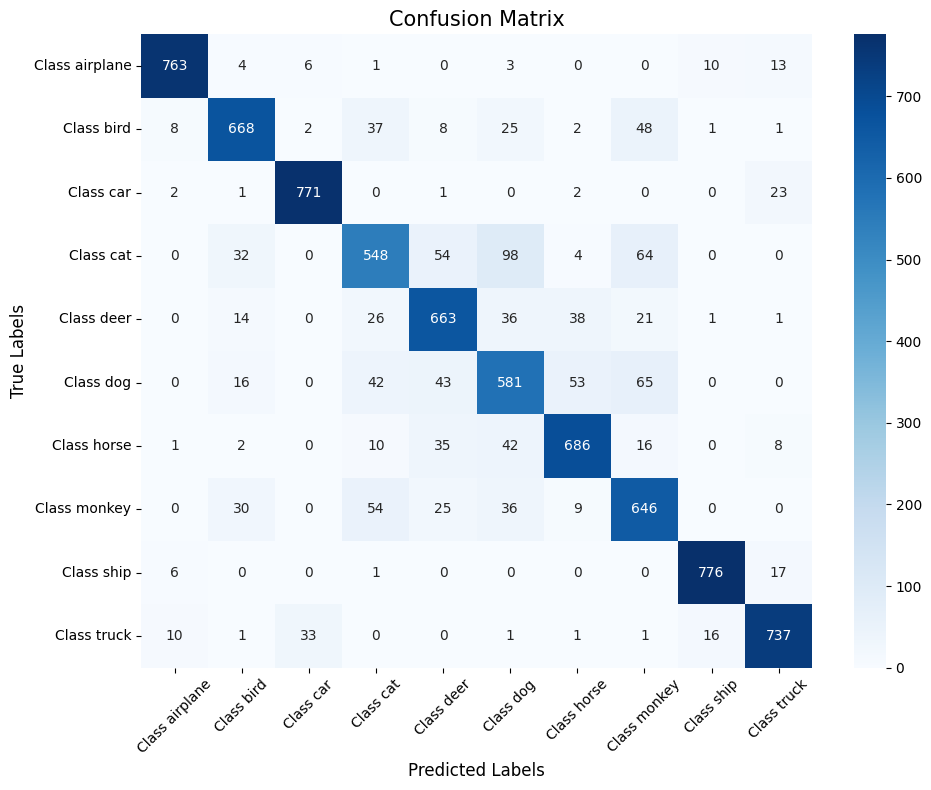

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

neigh = KNeighborsClassifier(n_neighbors=10, metric="cosine", weights= "distance").fit(embeddingsT, labels)

preds = neigh.predict(embeddings_testT)
#  Compute confusion matrix
cm = confusion_matrix(labels_test, preds)
classes = ('airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck')
class_names = [f"Class {i}" for i in classes]  # Replace with actual class names if available

#  Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)


plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()


plt.show()

###cifar

In [ ]:
import pickle

with open('/content/CIFAR10embeddings_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
embeddings = data['train_embeddings']
embeddings_test = data['test_embeddings']
labels = data['train_labels']
labels_test = data['test_labels']

In [ ]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(embeddings)

embeddingsT = transformer.transform(embeddings)
embeddings_testT = transformer.transform(embeddings_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=256)
pca.fit(embeddingsT)
embeddingsT = pca.transform(embeddingsT)
embeddings_testT = pca.transform(embeddings_testT)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import gc
gc.collect()
# for i in range(5, 300, 5):
#   neigh = KNeighborsClassifier(n_neighbors=i, metric="cosine", weights= "distance").fit(embeddingsT, labels)
#   sc = neigh.score(embeddings_testT, labels_test)
#   print(f"k_NN with {i} neighbors accuracy: {sc}")
neigh = KNeighborsClassifier(n_neighbors=65, metric="cosine", weights= "distance").fit(embeddingsT, labels)
sc = neigh.score(embeddings_testT, labels_test)
print(f"k_NN with {65} neighbors accuracy: {sc}")

k_NN with 65 neighbors accuracy: 0.4934


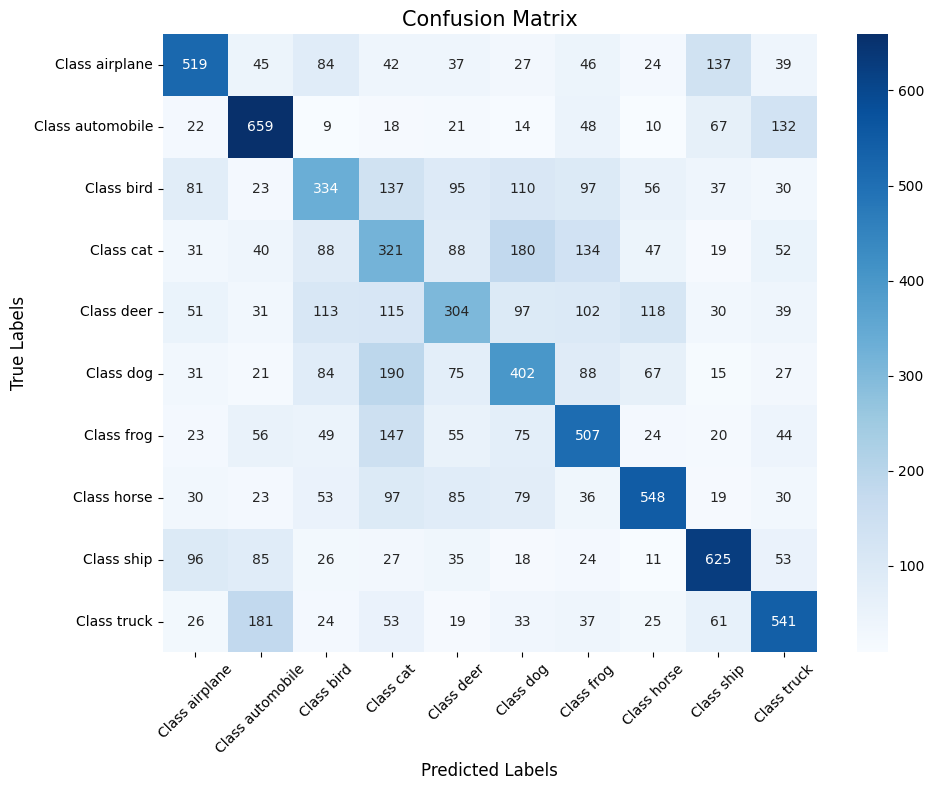

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

neigh = KNeighborsClassifier(n_neighbors=10, metric="cosine", weights= "distance").fit(embeddingsT, labels)

preds = neigh.predict(embeddings_testT)
# Compute confusion matrix
cm = confusion_matrix(labels_test, preds)
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_names = [f"Class {i}" for i in classes]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)


plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()


plt.show()

###EuroSAT

In [1]:
import pickle

with open('/content/EUROSATembeddings_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [2]:
embeddings = data['train_embeddings']
embeddings_test = data['test_embeddings']
labels = data['train_labels']
labels_test = data['test_labels']

In [3]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(embeddings)

embeddingsT = transformer.transform(embeddings)
embeddings_testT = transformer.transform(embeddings_test)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=512)
pca.fit(embeddingsT)
embeddingsT = pca.transform(embeddingsT)
embeddings_testT = pca.transform(embeddings_testT)

#EuroSat 512 neigh 10
#Cifar our 256 neigh 65    49.34
#Cifar resnet 256 neigh 20    59.48
#stl our 450 neigh 10 85.48
#stl resnet 256 neigh 10 87.75

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import gc
gc.collect()
# for i in range(5, 300, 5):
#   neigh = KNeighborsClassifier(n_neighbors=i, metric="cosine", weights= "distance").fit(embeddingsT, labels)
#   sc = neigh.score(embeddings_testT, labels_test)
#   print(f"k_NN with {i} neighbors accuracy: {sc}")
neigh = KNeighborsClassifier(n_neighbors=10, metric="cosine", weights= "distance").fit(embeddingsT, labels)
sc = neigh.score(embeddings_testT, labels_test)
print(f"k_NN with {10} neighbors accuracy: {sc}")

k_NN with 10 neighbors accuracy: 0.7567959405581732


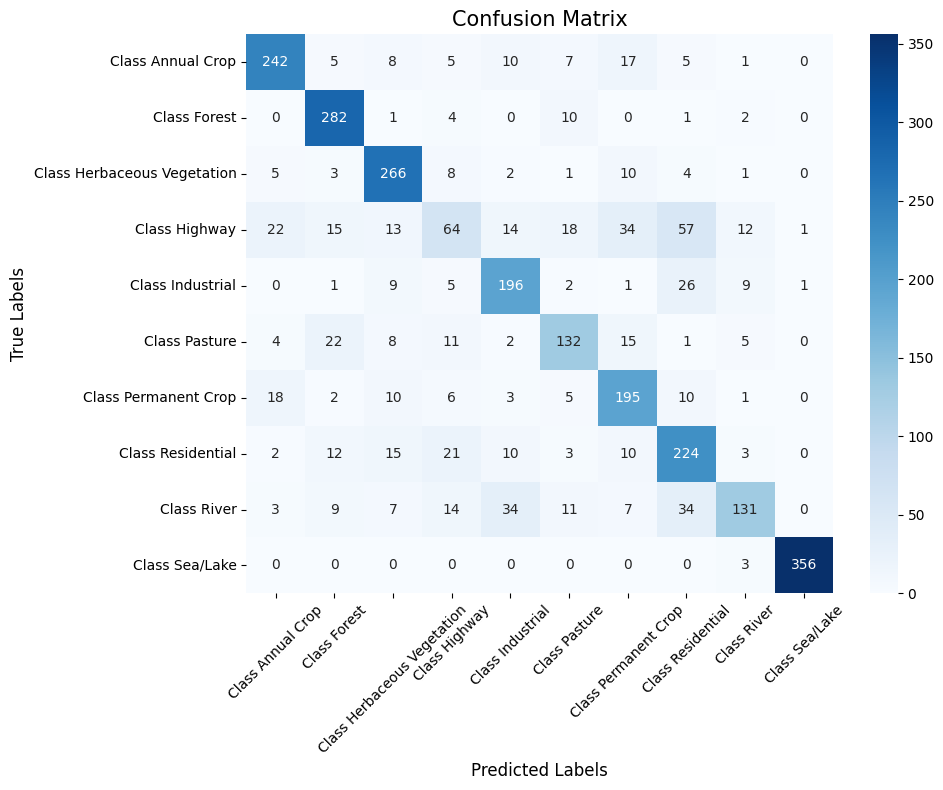

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

neigh = KNeighborsClassifier(n_neighbors=10, metric="cosine", weights= "distance").fit(embeddingsT, labels)

preds = neigh.predict(embeddings_testT)
# Compute confusion matrix
cm = confusion_matrix(labels_test, preds)
classes = ("Annual Crop", "Forest", "Herbaceous Vegetation", "Highway", "Industrial", "Pasture", "Permanent Crop", "Residential", "River", "Sea/Lake")
class_names = [f"Class {i}" for i in classes]  # Replace with actual class names if available

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)


plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()


plt.show()

##embeddings resnet

In [ ]:
from torchvision.models import resnet18
model = resnet18(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 345MB/s]


In [ ]:
import numpy as np
samples = len(dataset)
embeddings_resnet = np.zeros((samples, 512))
embeddings_test_resnet = np.zeros((len(test), 512))
labels_resnet = np.zeros(samples)
labels_test_resnet = np.zeros(len(test))

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
i=0
for x, label in train_dataloader:
    x = x.to(device)
    with torch.no_grad():
        output = get_features(model, x, after_pooling = True)
    embeddings_resnet[i*batch_size:(i+1)*batch_size] = output.cpu().numpy()
    labels_resnet[i*batch_size:(i+1)*batch_size] = label.numpy()
    i+=1

In [ ]:
model.eval()
i=0
for x, label in test_dataloader:
    x = x.to(device)
    with torch.no_grad():
        output = get_features(model, x, after_pooling = True)
    embeddings_test_resnet[i*batch_size:(i+1)*batch_size] = output.cpu().numpy()
    labels_test_resnet[i*batch_size:(i+1)*batch_size] = label.numpy()
    i+=1

In [ ]:
import pickle
embeddings_data_resnet = {
        'train_embeddings': embeddings_resnet,
        'train_labels': labels_resnet,
        'test_embeddings': embeddings_test_resnet,
        'test_labels': labels_test_resnet
    }
with open('CIFAR10embeddings_dataset_resnet.pkl', 'wb') as f:
        pickle.dump(embeddings_data_resnet, f)

In [ ]:
from sklearn.preprocessing import Normalizer

transformer_resnet = Normalizer().fit(embeddings_resnet)

embeddings_resnetT = transformer_resnet.transform(embeddings_resnet)
embeddings_test_resnetT = transformer_resnet.transform(embeddings_test_resnet)

In [ ]:
neigh.score(embeddings_test_resnet, labels_test_resnet)

0.794

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(10, 250, 40):
  neigh = KNeighborsClassifier(n_neighbors=i, metric="cosine").fit(embeddings_resnetT, labels_resnet)
  sc = neigh.score(embeddings_test_resnetT, labels_test_resnet)
  print(f"k_NN with {i} neighbors accuracy: {sc}")

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10, metric="cosine").fit(embeddingsT, labels)
sc = neigh.score(embeddings_testT, labels_test)
sc

0.848125

#Filter activation

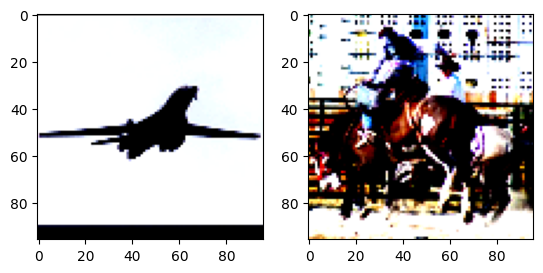

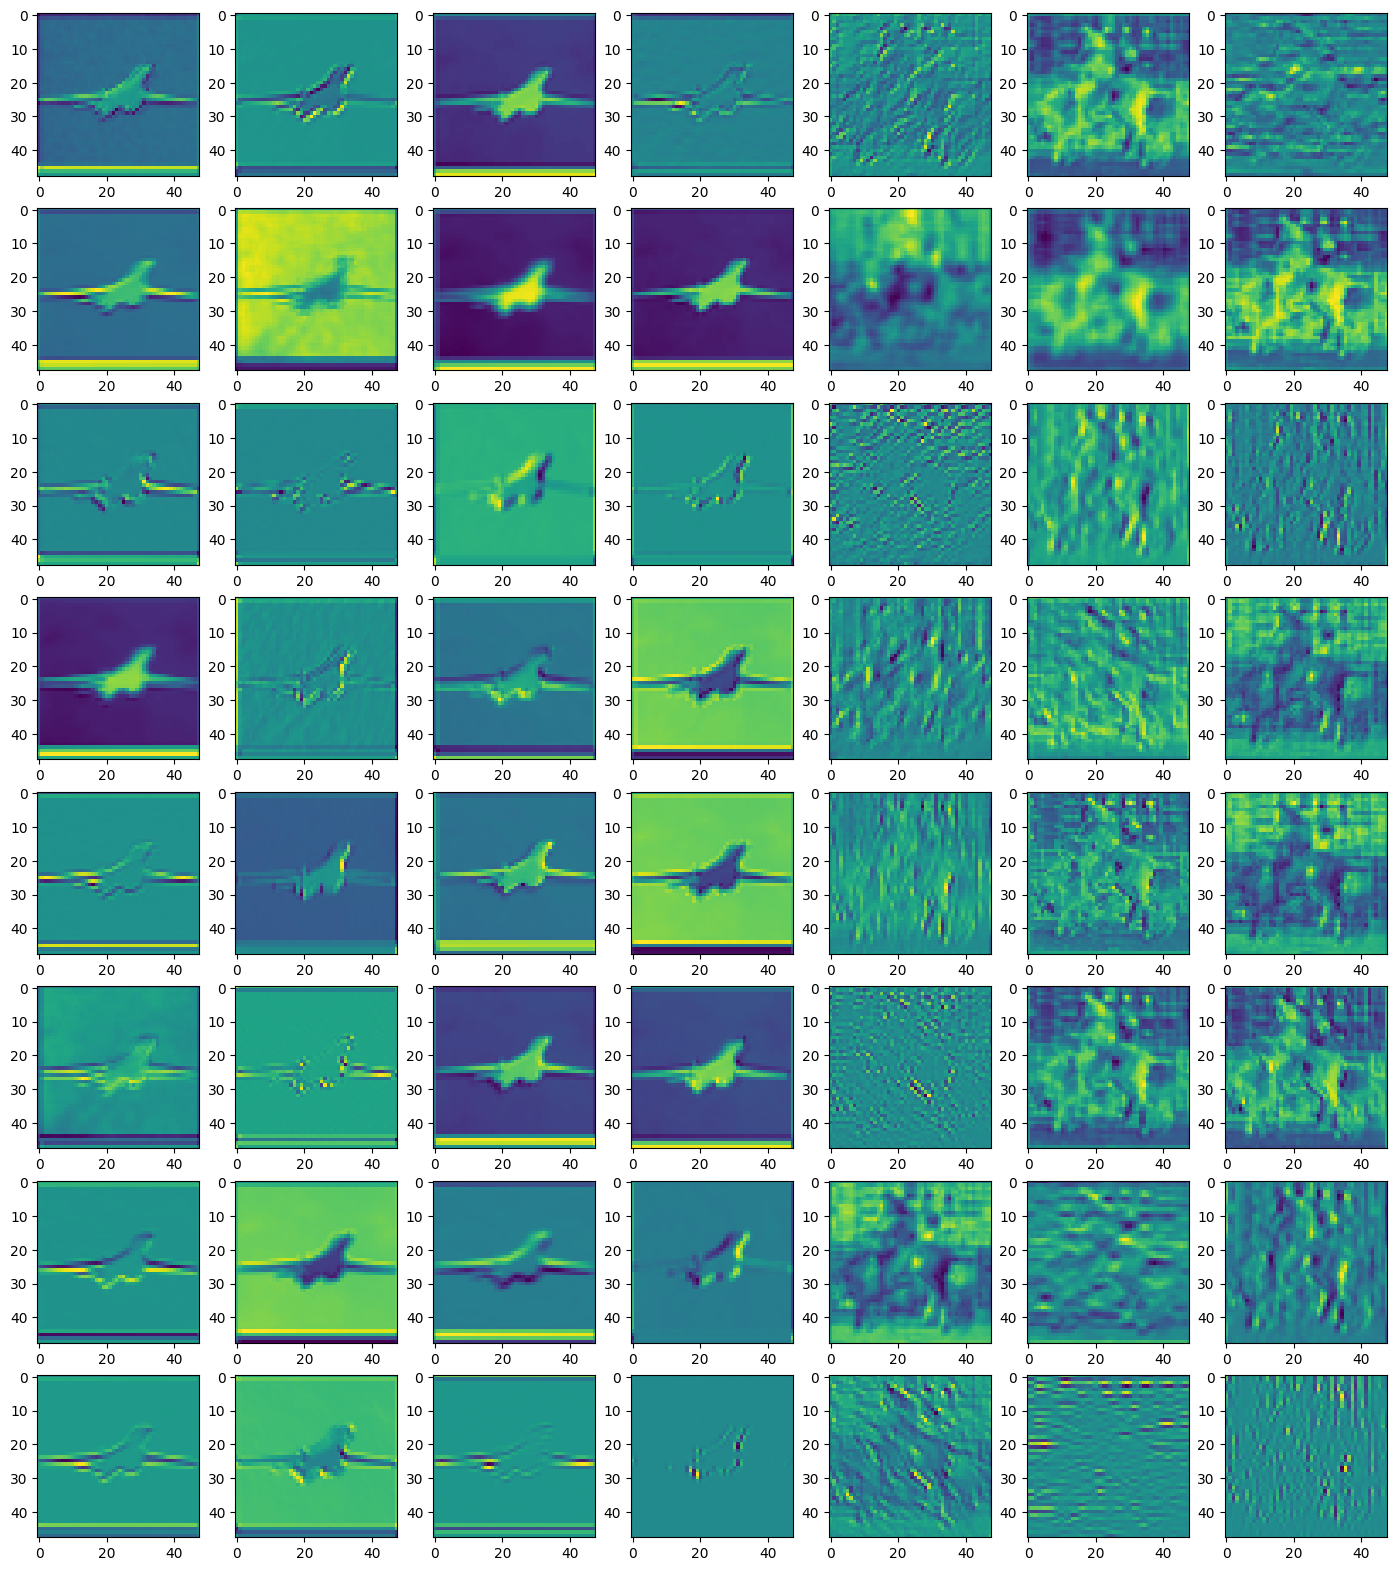

In [ ]:
iteraz = iter(test_dataloader)
model = model.to(device)
x, _ = next(iteraz)
x = x.to(device)
image1 = x[42]
image2 = x[43]
filters1, filters2 = model.conv1(x)[42:44]
plt.subplot(1, 2, 1)
plt.imshow(image1.permute(1, 2, 0).cpu().detach().numpy())
plt.subplot(1, 2, 2)
plt.imshow(image2.permute(1, 2, 0).cpu().detach().numpy())
plt.show()

plt.figure(figsize=(20, 40))
for i in range(64):
    k = np.mod(i, 4)
    l = np.floor(i/8)

    plt.subplot(16, 8, int(8*l+k+1))
    plt.imshow(filters1[i].cpu().detach().numpy())
    plt.subplot(16, 8, int(8*l + k + 4))
    plt.imshow(filters2[i].cpu().detach().numpy())
plt.show()